<a href="https://colab.research.google.com/github/Rohan171819/Machine_Learning_Projects./blob/main/Car_Fuel_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_excel("CarFuelData.xlsx")
Data=pd.DataFrame(data)
Data

,mpg,Cylinders,displacement,horsepower,weight,acceleration,model year,car name,car name_numeric_data,car type,km(in 15 yrs.),Co2_Emission(Kg)
0,18.0,8,307.0,130,3504,12.0,70,buick skylark 320,101,Private Vehicle,114.750,114750.0
1,15.0,8,350.0,165,3693,11.5,70,plymouth satellite,102,Private Vehicle,95.625,95625.0
2,18.0,8,318.0,150,3436,11.0,70,amc rebel sst,103,Private Vehicle,114.750,114750.0
3,16.0,8,304.0,150,3433,12.0,70,ford,104,Private Vehicle,102.000,102000.0
4,17.0,8,302.0,140,3449,10.5,70,ford plymouth satellite,105,Private Vehicle,108.375,108375.0
...,...,...,...,...,...,...,...,...,...,...,...,...
384,36.0,4,135.0,84,2370,13.0,82,chevrolet camaro,485,Commercial Vehicle,229.500,229500.0
385,27.0,4,151.0,90,2950,17.3,82,ford mustang gl,486,Commercial Vehicle,172.125,172125.0
386,27.0,4,140.0,86,2790,15.6,82,vw pickup,487,Commercial Vehicle,172.125,172125.0
387,44.0,4,97.0,52,2130,24.6,82,dodge rampage,488,Commercial Vehicle,280.500,280500.0


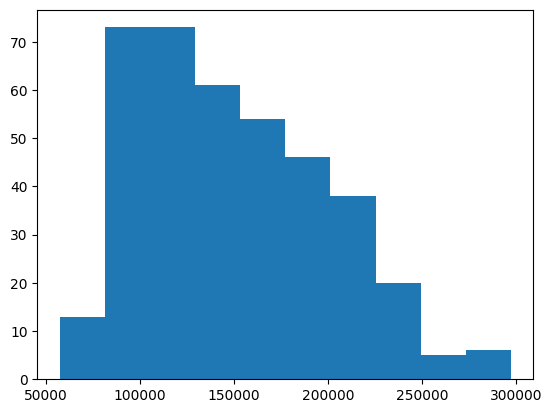

In [ ]:
plt.hist(Data[["Co2_Emission(Kg)"]])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D object at 0x78fc04bf3610>, <matplotlib.lines.Line2D object at 0x78fc04bf38b0>], 'caps': [<matplotlib.lines.Line2D object at 0x78fc04bf3b50>, <matplotlib.lines.Line2D object at 0x78fc04bf3df0>], 'boxes': [<matplotlib.lines.Line2D object at 0x78fc04bf3340>], 'medians': [<matplotlib.lines.Line2D object at 0x78fc04c240d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x78fc04c24370>], 'means': []}


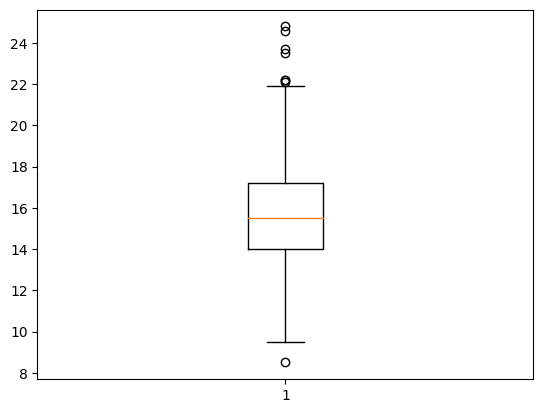

In [ ]:
# Showing the Boxplot graph on the Accleration of cars.
print(plt.boxplot(Data[["acceleration"]]))
plt.show()

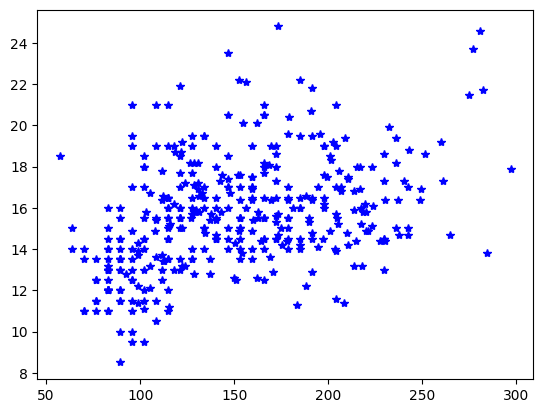

In [ ]:
# Relationship between the accleration and the distance covered.
X_Values=Data[["km(in 15 yrs.)"]]
Y_Values=Data[["acceleration"]]
plt.plot(X_Values,Y_Values,"b*")
plt.show()

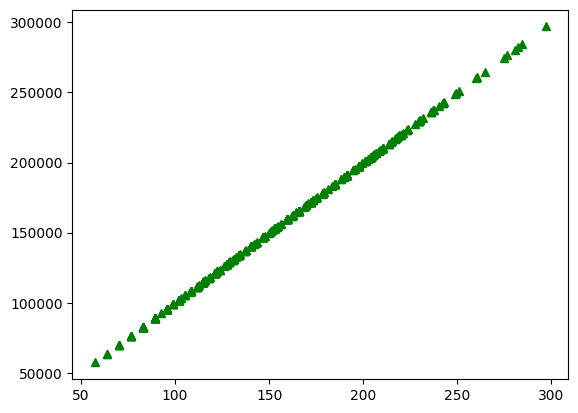

In [ ]:
# Relationship between the Distnace and the Carbon Dioxide emissions.
X_Values=Data[["km(in 15 yrs.)"]]
Y_Values=Data[["Co2_Emission(Kg)"]]
plt.plot(X_Values,Y_Values,"g^")
plt.show()

<Axes: ylabel='Density'>

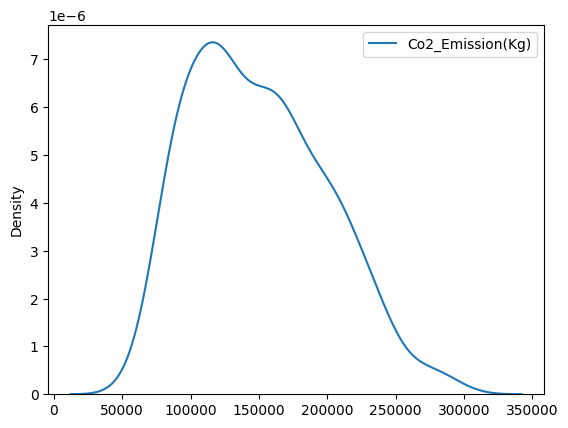

In [ ]:
import seaborn as sn
sn.kdeplot(Data[["Co2_Emission(Kg)"]])

# One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop="first",sparse=False,dtype=np.int64)
Car_type=ohe.fit_transform(Data[["car type"]])
data["Car_type"]=Car_type

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Splitting the data between the train and test data.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Data[["mpg","Cylinders","displacement","horsepower","weight","acceleration","model year","car name","car name_numeric_data","km(in 15 yrs.)"]],data[["Car_type","Co2_Emission(Kg)"]],test_size=0.4)

In [ ]:
Data[["car type"]].value_counts()
Data[["car name"]].value_counts()
Data[["car name_numeric_data"]].value_counts()

car name_numeric_data
101                      1
345                      1
367                      1
366                      1
365                      1
                        ..
228                      1
227                      1
226                      1
225                      1
489                      1
Length: 389, dtype: int64

Extracting the Values

In [ ]:
X_train_mpg=X_train.drop(columns=["Cylinders","displacement","horsepower","weight","acceleration","model year","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_test_mpg=X_test.drop(columns=["Cylinders","displacement","horsepower","weight","acceleration","model year","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_train_Cylinders=X_train.drop(columns=["mpg","displacement","horsepower","weight","acceleration","model year","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_test_Cylinders=X_test.drop(columns=["mpg","displacement","horsepower","weight","acceleration","model year","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_train_displacement=X_train.drop(columns=["mpg","Cylinders","horsepower","weight","acceleration","model year","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_test_displacement=X_test.drop(columns=["mpg","Cylinders","horsepower","weight","acceleration","model year","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_train_horsepower=X_train.drop(columns=["mpg","Cylinders","displacement","weight","acceleration","model year","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_test_horsepower=X_test.drop(columns=["mpg","Cylinders","displacement","weight","acceleration","model year","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_train_weight=X_train.drop(columns=["mpg","Cylinders","displacement","horsepower","acceleration","model year","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_test_weight=X_test.drop(columns=["mpg","Cylinders","displacement","horsepower","acceleration","model year","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_train_acceleration=X_train.drop(columns=["mpg","Cylinders","displacement","horsepower","weight","model year","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_test_acceleration=X_test.drop(columns=["mpg","Cylinders","displacement","horsepower","weight","model year","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_train_modelyear=X_train.drop(columns=["mpg","Cylinders","displacement","horsepower","weight","acceleration","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_test_modelyear=X_test.drop(columns=["mpg","Cylinders","displacement","horsepower","weight","acceleration","car name","car name_numeric_data","km(in 15 yrs.)"]).values
X_train_km_15yrs=X_train.drop(columns=["mpg","Cylinders","displacement","horsepower","weight","acceleration","model year","car name","car name_numeric_data"]).values
X_test_km_15yrs=X_test.drop(columns=["mpg","Cylinders","displacement","horsepower","weight","acceleration","model year","car name","car name_numeric_data"]).values
X_train_carname_numeric_data=X_train.drop(columns=["mpg","Cylinders","displacement","horsepower","weight","acceleration","model year","car name","km(in 15 yrs.)"]).values
X_test_carname_numeric_data=X_test.drop(columns=["mpg","Cylinders","displacement","horsepower","weight","acceleration","model year","car name","km(in 15 yrs.)"]).values
Y_train_Co2_Emission=Y_train.drop(columns="Car_type").values
Y_test_Co2_Emission=Y_test.drop(columns="Car_type").values
Y_train_Car_type=Y_train.drop(columns="Co2_Emission(Kg)").values
Y_test_Car_type=Y_test.drop(columns="Co2_Emission(Kg)").values

In [ ]:
X_train_transformed=np.concatenate((X_train_mpg,X_train_Cylinders,X_train_displacement,X_train_horsepower,X_train_weight,X_train_acceleration,X_train_modelyear,X_train_km_15yrs,X_train_carname_numeric_data),axis=1)
X_test_transformed=np.concatenate((X_test_mpg,X_test_Cylinders,X_test_displacement,X_test_horsepower,X_test_weight,X_test_acceleration,X_test_modelyear,X_test_km_15yrs,X_test_carname_numeric_data),axis=1)
Y_train_transformed=np.concatenate((Y_train_Co2_Emission,Y_train_Car_type),axis=1)
Y_test_transformed=np.concatenate((Y_test_Co2_Emission,Y_test_Car_type),axis=1)

# Perceptron Function

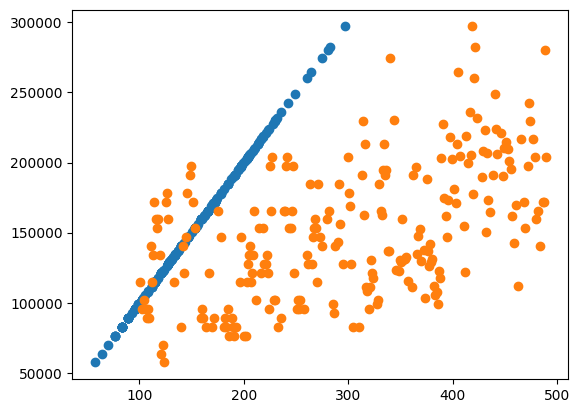

In [ ]:
plt.scatter(X_train_km_15yrs,Y_train_Co2_Emission)
plt.scatter(X_train_carname_numeric_data,Y_train_Co2_Emission)
plt.show()

In [ ]:
print(X_train_carname_numeric_data.shape)
print(Y_train_Co2_Emission.shape)
X=X_train_km_15yrs
y=Y_train_Car_type

(233, 1)
(233, 1)


In [ ]:
def Perceptron(X,y):
  X=np.insert(X,0,1,axis=1)
  weights=np.ones(X.shape[1])
  lr=0.1
  for i in range(1000):
    j=np.random.randint(0,200)
    y_hat=step(np.dot(X[j],weights))
    weights=weights + lr*(y[j]-y_hat)*X[j]

  return weights[0],weights[1:]


In [ ]:
def step(a):
  if(a>0):
    return 1
  else:
    return 0

In [ ]:
intercept_,coef_=Perceptron(X,y)
print(intercept_)
print(coef_)

-8.499999999999986
[-5.82125]


In [ ]:
m=coef_
b=intercept_

In [ ]:
x_input=np.linspace(-2,2,100)
y_input=(m*x_input+b)

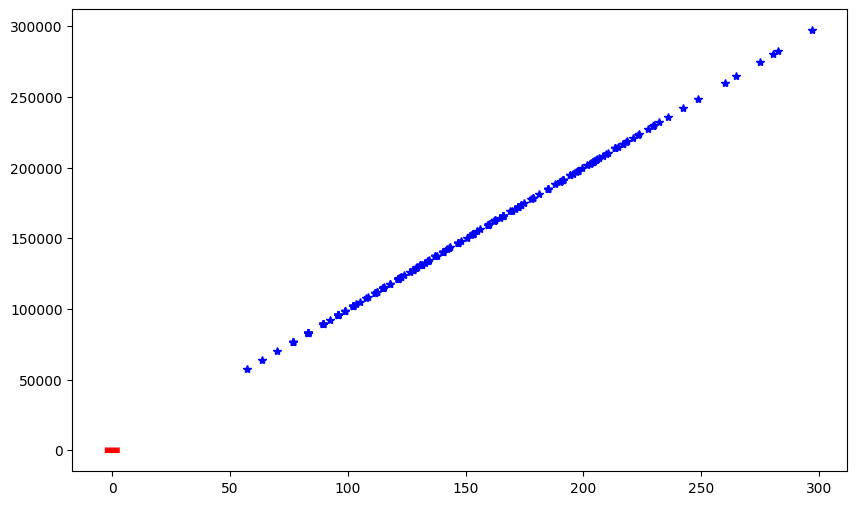

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color="red",linewidth=4)
plt.plot(X_train_km_15yrs,Y_train_Co2_Emission,"b*")
plt.show()

# Linear Regression

In [ ]:
# Splitting the data between the train and test data.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Data[["mpg","Cylinders","displacement","weight","acceleration","model year","car name_numeric_data","km(in 15 yrs.)"]],Data[["Car_type","Co2_Emission(Kg)"]],test_size=0.4)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train,Y_train)
X_train.values
Y_train.values

array([[1.000000e+00, 1.912500e+05],
       [1.000000e+00, 1.402500e+05],
       [0.000000e+00, 9.562500e+04],
       [1.000000e+00, 1.421625e+05],
       [0.000000e+00, 1.020000e+05],
       [0.000000e+00, 1.147500e+05],
       [1.000000e+00, 2.601000e+05],
       [1.000000e+00, 1.593750e+05],
       [1.000000e+00, 1.810500e+05],
       [0.000000e+00, 1.115625e+05],
       [0.000000e+00, 8.925000e+04],
       [0.000000e+00, 8.287500e+04],
       [1.000000e+00, 2.040000e+05],
       [1.000000e+00, 1.275000e+05],
       [1.000000e+00, 1.510875e+05],
       [0.000000e+00, 9.562500e+04],
       [1.000000e+00, 1.530000e+05],
       [1.000000e+00, 2.059125e+05],
       [1.000000e+00, 1.275000e+05],
       [0.000000e+00, 8.287500e+04],
       [0.000000e+00, 7.012500e+04],
       [1.000000e+00, 2.135625e+05],
       [1.000000e+00, 1.306875e+05],
       [1.000000e+00, 2.103750e+05],
       [0.000000e+00, 1.147500e+05],
       [1.000000e+00, 1.734000e+05],
       [1.000000e+00, 1.466250e+05],
 

In [ ]:
Y_PREDICTED=lr.predict(X_train)

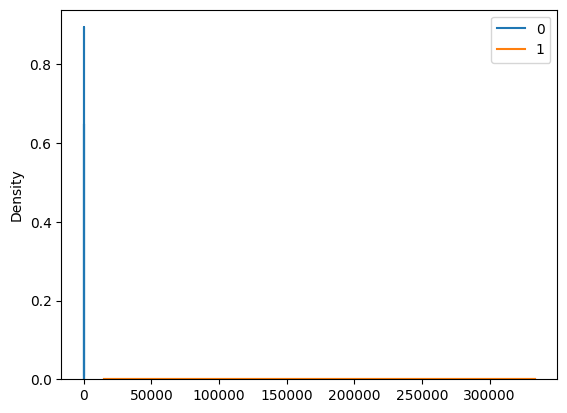

In [ ]:
import seaborn as sn
#plt.(X_train,Y_train)
sn.kdeplot(Y_train)
sn.kdeplot(Y_PREDICTED)
plt.show()

# Logistic Regression

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_transformed=le.fit_transform(y)
y_transformed

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(X,y_transformed)


LogisticRegression()

In [ ]:
m=coef_
b=intercept_
x_input=np.linspace(100,500,1000)
y_input=(m*x_input+b)

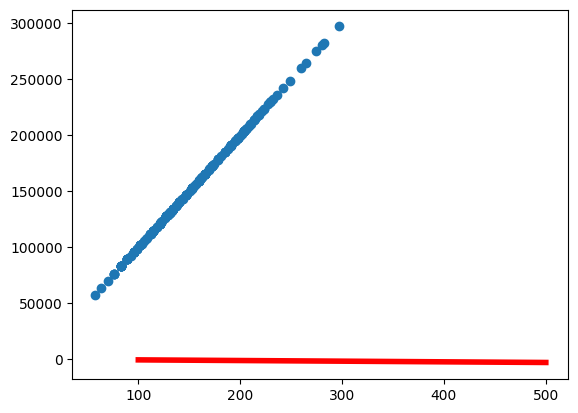

In [ ]:
plt.plot(x_input,y_input,color="red",linewidth=4)
plt.scatter(X_train_km_15yrs,Y_train_Co2_Emission)
plt.show()

# Sigmoid Function

In [ ]:
def Perceptron(X,y):
  X=np.insert(X,0,1,axis=1)
  weights=np.ones(X.shape[1])
  lr=0.1
  for i in range(1000):
    j=np.random.randint(0,200)
    y_hat=Sigmoid(np.dot(X[j],weights))
    weights=weights + lr*(y[j]-y_hat)*X[j]

  return weights[0],weights[1:]

In [ ]:
def Sigmoid(z):
  return (1/1+np.exp(-z))

In [ ]:
intercept_,coef_=Perceptron(X,y)
print(intercept_)
print(coef_)

-inf
[-inf]


<ipython-input-30-d3fc8a48a13b>:2: RuntimeWarning: overflow encountered in exp
  return (1/1+np.exp(-z))


In [ ]:
m=coef_
b=intercept_

In [ ]:
x_axis=X_train_km_15yrs
y_input=(m*x_axis+b)

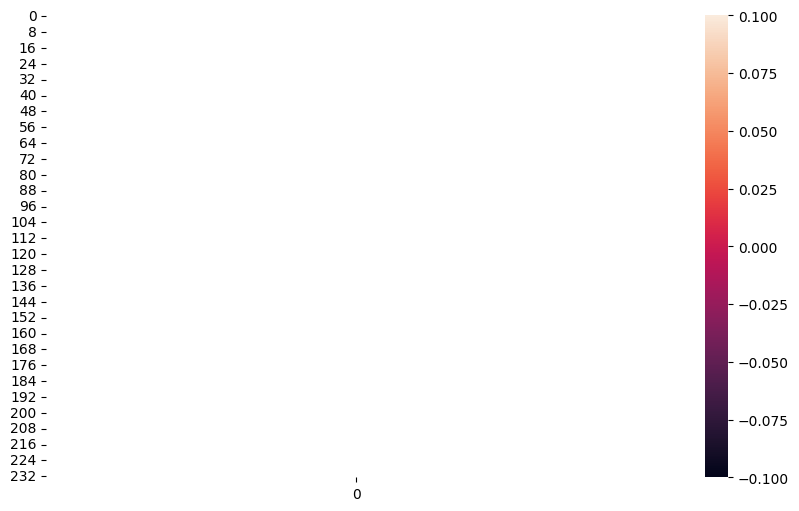

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(y_input)
plt.show()

# Polynomial Logistic Regression

In [ ]:
X1=X_train_carname_numeric_data
X2=X_train_km_15yrs
y1=Y_train_Co2_Emission
y2=Y_train_Car_type

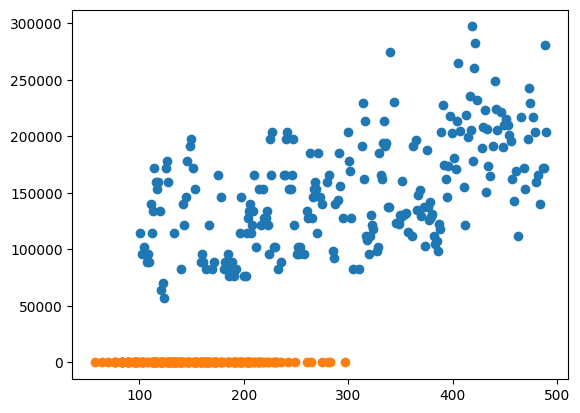

In [ ]:
plt.scatter(X1,y1)
plt.scatter(X2,y2)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression()

In [ ]:
clf1.fit(X1,y_transformed)
clf1.fit(X2,y_transformed)

LogisticRegression()

In [ ]:
pip install mlxtend --upgrade --no-deps

In [ ]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(clf1,X1,y_transformed,scoring="accuracy",cv=10)))

0.7125


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=1)
X1_train_trf,X1_test_trf=poly.fit_transform(X_train_carname_numeric_data),poly.fit_transform(X_test_carname_numeric_data)
lor.fit(X1_train_trf,y_transformed)
intercept=lor.intercept_
coef=lor.coef_
print(coef)

[[-1.53317631e-06  8.68541749e-03]]


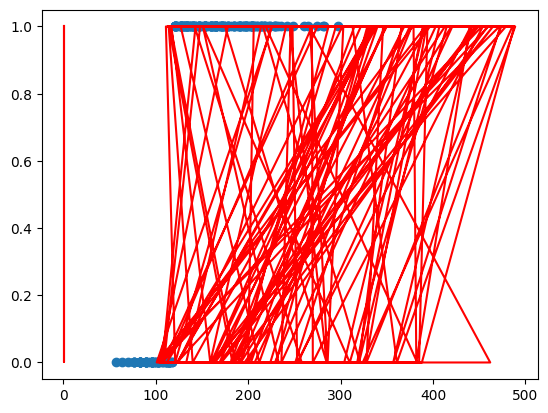

In [ ]:
plt.plot(X1_train_trf,y_transformed,color="r")
plt.scatter(X_train_km_15yrs,y_transformed)
plt.show()

# KNN

Splitting the Data

In [ ]:
# Splitting the data between the train and test data.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data[["mpg","Cylinders","displacement","weight","acceleration","model year","car name_numeric_data","km(in 15 yrs.)"]],data[["Co2_Emission(Kg)"]],train_size=0.8)
print(X_train.shape)
print(Y_train.shape)

(311, 8)
(311, 1)


In [ ]:
print(X_train.dtypes)
print(Y_train.dtypes)

mpg                      float64
Cylinders                  int64
displacement             float64
weight                     int64
acceleration             float64
model year                 int64
car name_numeric_data      int64
km(in 15 yrs.)           float64
dtype: object
Co2_Emission(Kg)    float64
dtype: object


Scaling the Values

In [ ]:
from sklearn.preprocessing import StandardScaler
Scale=StandardScaler()

In [ ]:
Scale.fit_transform(X_train)
Scale.transform(X_test)

array([[ 0.22358285, -0.27761953, -0.09678586,  0.64325717,  1.72243844,
         0.79482127,  0.84595412,  0.22358285],
       [-1.09604554,  0.30972519,  0.54929037,  0.41814347,  0.55291742,
        -0.58921801, -0.66334703, -1.09604554],
       [-0.46160882, -0.86496425, -0.76214794, -0.456783  , -0.57887712,
        -0.86602586, -0.74372401, -0.46160882],
       [-1.47670758,  1.48441463,  1.51358324,  1.76766533, -1.14477439,
        -0.86602586, -0.8598241 , -1.47670758],
       [-0.94378073,  0.30972519, -0.28964443,  0.50401158,  0.1001996 ,
         0.51801341,  0.6673386 , -0.94378073],
       [-0.71538351,  0.30972519,  0.30821715,  0.93915406,  1.30744711,
        -0.31241015, -0.35076987, -0.71538351],
       [ 1.5685887 , -0.86496425, -1.09965045, -1.33519061,  1.15654117,
         0.24120556,  0.14042281,  1.5685887 ],
       [ 0.29971525, -0.86496425, -0.92607773, -0.82462344,  1.00563523,
         0.24120556,  0.292246  ,  0.29971525],
       [-0.71538351,  0.30972519

In [ ]:
K=np.sqrt(X.shape[0])
K=19

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
obj=KNeighborsRegressor(n_neighbors=K)

In [ ]:
obj.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=19)

In [ ]:
Y_predicted=obj.predict(X_test)
print(Y_predicted.shape)
print(Y_test.shape)

(78, 1)
(78, 1)


In [ ]:
X_train.values
X_test.values

array([[2.540000e+01, 5.000000e+00, 1.830000e+02, 3.530000e+03,
        2.010000e+01, 7.900000e+01, 3.930000e+02, 1.619250e+02],
       [1.500000e+01, 6.000000e+00, 2.500000e+02, 3.336000e+03,
        1.700000e+01, 7.400000e+01, 2.240000e+02, 9.562500e+01],
       [2.000000e+01, 4.000000e+00, 1.140000e+02, 2.582000e+03,
        1.400000e+01, 7.300000e+01, 2.150000e+02, 1.275000e+02],
       [1.200000e+01, 8.000000e+00, 3.500000e+02, 4.499000e+03,
        1.250000e+01, 7.300000e+01, 2.020000e+02, 7.650000e+01],
       [1.620000e+01, 6.000000e+00, 1.630000e+02, 3.410000e+03,
        1.580000e+01, 7.800000e+01, 3.730000e+02, 1.032750e+02],
       [1.800000e+01, 6.000000e+00, 2.250000e+02, 3.785000e+03,
        1.900000e+01, 7.500000e+01, 2.590000e+02, 1.147500e+02],
       [3.600000e+01, 4.000000e+00, 7.900000e+01, 1.825000e+03,
        1.860000e+01, 7.700000e+01, 3.140000e+02, 2.295000e+02],
       [2.600000e+01, 4.000000e+00, 9.700000e+01, 2.265000e+03,
        1.820000e+01, 7.700000e+0

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(311, 8)
(311, 1)


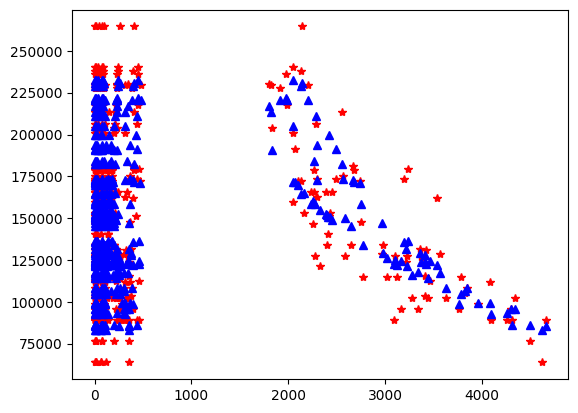

In [ ]:
plt.plot(X_test,Y_test,"r*")
plt.plot(X_test,Y_predicted,"b^")
plt.show()

In [ ]:
def predict_output():
  mpg=float(input("Enter the mpg of the car:"))
  Cylinders=int(input("Enter the number of Cylinders:"))
  Displacement=float(input("Enter the Displacement of Car:"))
  Weight=int(input("Enter the Weight of Car:"))
  Accleration=float(input("Enter the Acclearation:"))
  Model_Year=int(input("Enter the Model Year of the Car:"))
  Car_Name=int(input("Enter the Car Name in Numeric Data(Above 100):"))
  Km_Driven=float(input("Enter the Km Driven:"))
  X_new=np.array([[mpg],[Cylinders],[Displacement],[Weight],[Accleration],[Model_Year],[Car_Name],[Km_Driven]]).reshape(1,8)
  X_new=Scale.transform(X_new)
  return obj.predict(X_new)[0]

In [ ]:
#data
X_train1,X_test1,Y_train1,Y_test1=train_test_split(data[["car name_numeric_data","km(in 15 yrs.)"]],data[["Car_type"]],train_size=0.8)
X_train1=Scale.fit_transform(X_train1)
X_test1=Scale.transform(X_test1)


In [ ]:
a=np.arange(start=X_train1[:,0].min()-1,stop=X_train1[:,0].max()+1,step=0.01)
b=np.arange(start=X_train1[:,1].min()-1,stop=X_train1[:,1].max()+1,step=0.01)
print(a.shape)
print(b.shape)

(543,)
(666,)


In [ ]:
XX,YY=np.meshgrid(a,b)
XX.shape
YY.shape

(666, 543)

In [ ]:
print(XX[0][0])
print(YY[0][0])
Input_Array=np.array([XX.ravel(),YY.ravel()]).T
k=2
knn=KNeighborsRegressor(n_neighbors=K)

-2.7101184515920456
-2.9257948344616684


In [ ]:
knn.fit(X_train1,Y_train1)

KNeighborsRegressor(n_neighbors=19)

In [ ]:
labels=knn.predict(Input_Array)

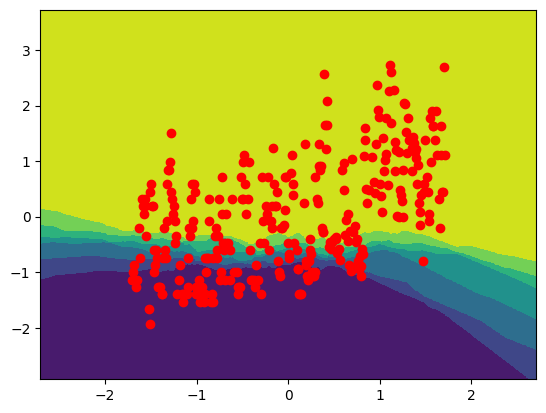

In [ ]:
plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.scatter(X_train1[:,0],X_train1[:,1],c="r")

# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data[["mpg","Cylinders","displacement","weight","acceleration","model year","car name_numeric_data","km(in 15 yrs.)","Car_type"]],data[["Co2_Emission(Kg)"]],train_size=0.8)
print(X_train.shape)
print(Y_train.shape)


(311, 9)
(311, 1)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_features=3,splitter ='random',max_depth=2)

In [ ]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2, max_features=3, splitter='random')

In [ ]:
Y_predict=dt.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict)

0.5231721904523904

[Text(0.5, 0.8333333333333334, 'x[1] <= 4.806\nsquared_error = 2632375313.789\nsamples = 311\nvalue = 149722.307'),
 Text(0.25, 0.5, 'x[5] <= 75.549\nsquared_error = 1400024010.367\nsamples = 155\nvalue = 189444.435'),
 Text(0.125, 0.16666666666666666, 'squared_error = 560531756.25\nsamples = 50\nvalue = 164092.5'),
 Text(0.375, 0.16666666666666666, 'squared_error = 1347983142.347\nsamples = 105\nvalue = 201516.786'),
 Text(0.75, 0.5, 'x[2] <= 282.798\nsquared_error = 731410343.473\nsamples = 156\nvalue = 110254.808'),
 Text(0.625, 0.16666666666666666, 'squared_error = 570857244.417\nsamples = 76\nvalue = 128070.395'),
 Text(0.875, 0.16666666666666666, 'squared_error = 295961287.5\nsamples = 80\nvalue = 93330.0')]

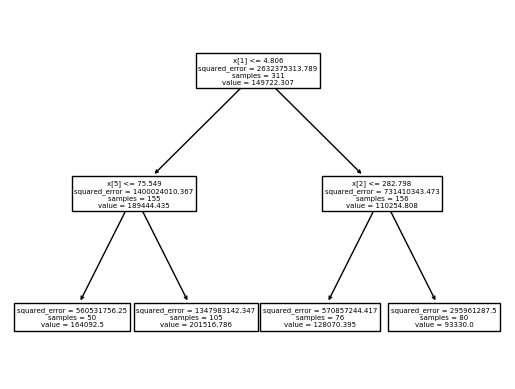

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [ ]:
dt.feature_importances_

array([0.        , 0.83768029, 0.08081543, 0.        , 0.        ,
       0.08150428, 0.        , 0.        , 0.        ])

### Hyper Parameter Tuning

In [ ]:
param_dist={"splitter":["best","random"],
          "max_features":[1,2,3,4,5,6,7 ,None]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(dt,param_grid=param_dist,cv=10,n_jobs=-1)

In [ ]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=2, max_features=3,
                                             splitter='random'),
             n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, None],
                         'splitter': ['best', 'random']})

In [ ]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=2, max_features=7)

In [ ]:
grid.best_params_

{'max_features': 7, 'splitter': 'best'}

In [ ]:
grid.best_score_

0.8970496085358505

In [ ]:
!pip install -q dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.5 MB/s eta 0:00:00


In [ ]:
import graphviz.backend as be
from dtreeviz.trees import *
from IPython.display import Image,display_svg,SVG

# Ensemble Learning

# Voting Ensemble

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1=train_test_split(data[["mpg","Cylinders","displacement","weight","acceleration","model year","car name_numeric_data","km(in 15 yrs.)","Car_type"]],data[["Co2_Emission(Kg)"]],train_size=0.8)
print(X_train1.shape)
print(Y_train1.shape)

(311, 9)
(311, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
lor=LogisticRegression()
lr=LinearRegression()
svr=SVR()
dt=DecisionTreeRegressor()

In [ ]:
Estimators=[("LogisticRegression",lor),("LinearRegression",lr),("SVR",svr),("DecisionTreeRegressor",dt)]

In [ ]:
vr=VotingRegressor(Estimators)

In [ ]:
X1=data[["mpg","Cylinders","displacement","weight","acceleration","model year","car name_numeric_data","km(in 15 yrs.)","Car_type"]]
Y1=data[["Co2_Emission(Kg)"]]
print(X_train1.shape)
print(Y_train1.shape)

(311, 9)
(311, 1)


In [ ]:
#for a in Estimators:
 # scores=cross_val_score(a[1],X1,Y1,scoring="r2",cv=10)
  #print(a[0],np.round(np.mean(scores),2))
data

,mpg,Cylinders,displacement,horsepower,weight,acceleration,model year,car name,car name_numeric_data,car type,km(in 15 yrs.),Co2_Emission(Kg),Car_type
0,18.0,8,307.0,130,3504,12.0,70,buick skylark 320,101,Private Vehicle,114.750,114750.0,0
1,15.0,8,350.0,165,3693,11.5,70,plymouth satellite,102,Private Vehicle,95.625,95625.0,0
2,18.0,8,318.0,150,3436,11.0,70,amc rebel sst,103,Private Vehicle,114.750,114750.0,0
3,16.0,8,304.0,150,3433,12.0,70,ford,104,Private Vehicle,102.000,102000.0,0
4,17.0,8,302.0,140,3449,10.5,70,ford plymouth satellite,105,Private Vehicle,108.375,108375.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,36.0,4,135.0,84,2370,13.0,82,chevrolet camaro,485,Commercial Vehicle,229.500,229500.0,1
385,27.0,4,151.0,90,2950,17.3,82,ford mustang gl,486,Commercial Vehicle,172.125,172125.0,1
386,27.0,4,140.0,86,2790,15.6,82,vw pickup,487,Commercial Vehicle,172.125,172125.0,1
387,44.0,4,97.0,52,2130,24.6,82,dodge rampage,488,Commercial Vehicle,280.500,280500.0,1


# Bagging

In [ ]:
Actual_data=data.drop(columns=["car name","car type","Car_type","horsepower"])
Actual_data=Actual_data[["model year","weight","car name_numeric_data","mpg","Cylinders","displacement","acceleration","km(in 15 yrs.)","Co2_Emission(Kg)"]].astype(float)
print(Actual_data.dtypes)
Data_train=Actual_data.iloc[:80:].sample(60,replace=True)
Data_test=Actual_data.iloc[:50:].sample(40,replace=True)
X_test=Data_test.iloc[:,0:9].values
Y_test=Data_test.iloc[:,-1].values

model year               float64
weight                   float64
car name_numeric_data    float64
mpg                      float64
Cylinders                float64
displacement             float64
acceleration             float64
km(in 15 yrs.)           float64
Co2_Emission(Kg)         float64
dtype: object


In [ ]:
dt_bag=Data_train.sample(50,replace=True)
dt_bag
X1=dt_bag.iloc[:,0:9]
Y1=dt_bag.iloc[:,-1]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import accuracy_score

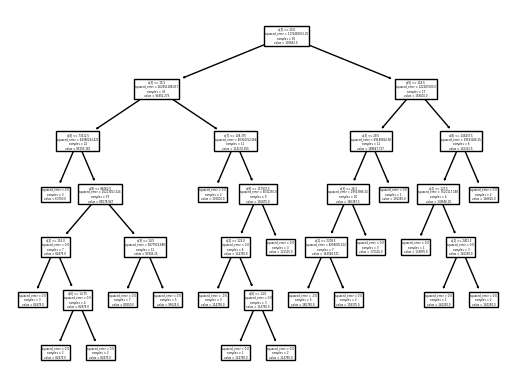

In [ ]:
dt_bag1=DecisionTreeRegressor()
dt_bag1.fit(X1,Y1)
plot_tree(dt_bag1)
plt.show()

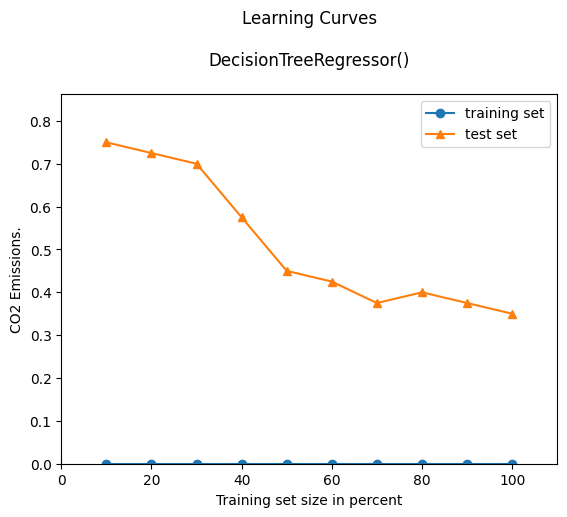

In [ ]:
plot_learning_curves(X1.values,Y1.values,X_test,Y_test,clf=dt_bag1)
plt.ylabel("CO2 Emissions.");
plt.show()

In [ ]:
dt_bag=Data_train.sample(50,replace=True)
dt_bag
X2=dt_bag.iloc[:,0:9]
Y2=dt_bag.iloc[:,-1]

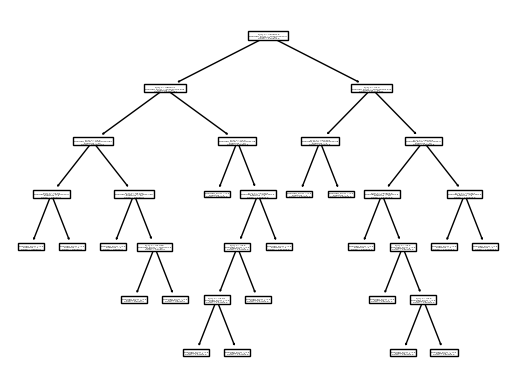

In [ ]:
dt_bag2=DecisionTreeRegressor()
dt_bag2.fit(X2,Y2)
plot_tree(dt_bag2)
plt.show()

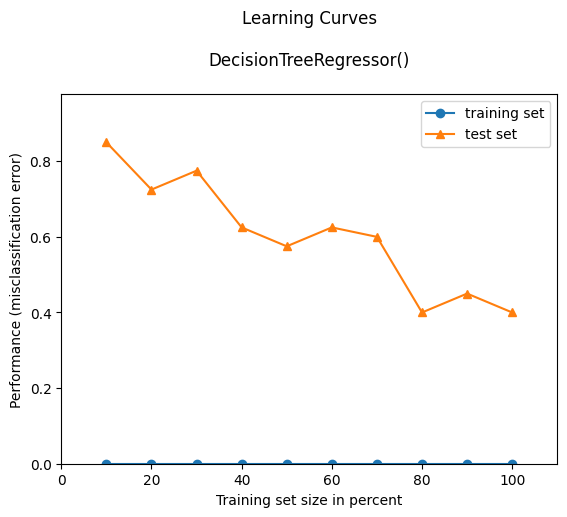

In [ ]:
plot_learning_curves(X2.values,Y2.values,X_test,Y_test,clf=dt_bag2)
plt.show()

In [ ]:
dt_bag=Data_train.sample(50,replace=True)
dt_bag
X3=dt_bag.iloc[:,0:9]
Y3=dt_bag.iloc[:,-1]

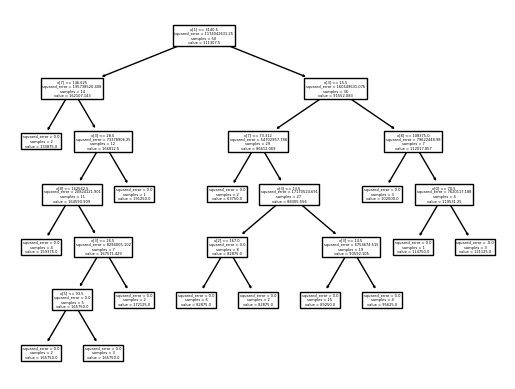

In [ ]:
dt_bag3=DecisionTreeRegressor()
dt_bag3.fit(X3,Y3)
plot_tree(dt_bag3)
plt.show()

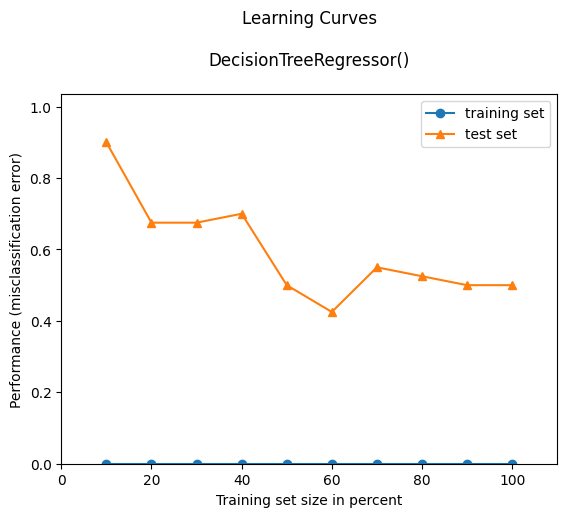

In [ ]:
plot_learning_curves(X3.values,Y3.values,X_test,Y_test,clf=dt_bag3)
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train2,X_test2,Y_train2,Y_test2=train_test_split(data[["mpg","Cylinders","displacement","weight","acceleration","model year","car name_numeric_data","km(in 15 yrs.)","Car_type"]],data[["Co2_Emission(Kg)"]],train_size=0.8)
print(X_train2.shape)
print(Y_train2.shape)


(311, 9)
(311, 1)


In [ ]:
rfr=RandomForestRegressor(max_depth=3, max_features=8, max_samples=150,n_estimators=200,oob_score=True)
rfr.fit(X_train2,Y_train2)

<ipython-input-96-fab05b844dfb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(max_depth=3, max_features=8, max_samples=150,
                      n_estimators=200, oob_score=True)

In [ ]:
Y_Predicted2=rfr.predict(X_test2)

In [ ]:
Y_Predicted2=Y_Predicted2.reshape(78,1)
print(Y_Predicted2.shape)

(78, 1)


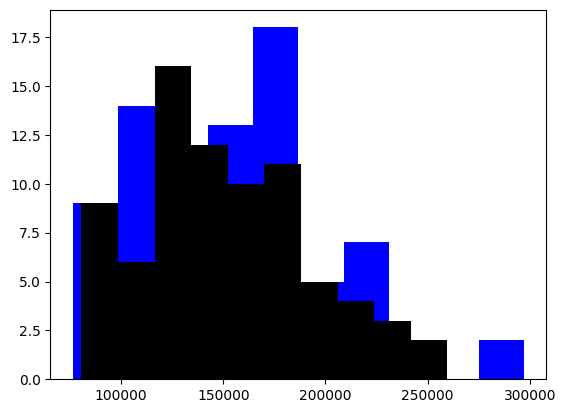

In [ ]:
plt.hist(Y_test2,color="blue")
plt.hist(Y_Predicted2,color="black")
plt.show()

<Axes: >

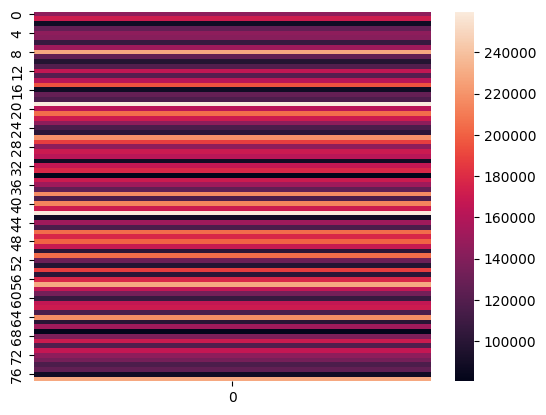

In [ ]:
import seaborn as sn
sn.heatmap(Y_Predicted2)

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test2,Y_Predicted2)

0.9868299289117006

In [ ]:
rfr.oob_score_

0.9934819098837704

In [ ]:
rfr.feature_importances_

array([0.51176932, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.48516718, 0.00306351])

In [ ]:
rfr.feature_importances_.shape

(9,)

### Hyper Parameter Tuning

In [ ]:
param_dist={"n_estimators":[100,150,200,None],
            "max_depth":[1,2,3,4,5,6,7,None],
            "max_features":[1,2,3,4,5,6,7,8,None],
            "max_samples":[50,100,150,200,250,None],
            "bootstrap":[True,False]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs_cv=RandomizedSearchCV(rfr,param_distributions=param_dist,cv=10,n_jobs=-1)

In [ ]:
rs_cv.fit(X_train2,Y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

----------------------------------------------------------------------------

RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(max_depth=3, max_features=8,
                                                   max_samples=150,
                                                   n_estimators=200,
                                                   oob_score=True),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7,
                                                      None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         None],
                                        'max_samples': [50, 100, 150, 200, 250,
                                                        None],
                                        'n_estimators': [100, 150, 200, None]})

In [ ]:
rs_cv.best_estimator_

RandomForestRegressor(max_depth=4, max_features=2, max_samples=200,
                      oob_score=True)

In [ ]:
rs_cv.best_score_

0.9687755776785678

# Principle Component Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train3,X_test3,Y_train3,Y_test3=train_test_split(data[["mpg","Cylinders","displacement","weight","acceleration","model year","car name_numeric_data","km(in 15 yrs.)","Car_type"]],data[["Co2_Emission(Kg)"]],train_size=0.4)
Scaler=StandardScaler()
print(X_train3.shape)
print(Y_train3.shape)

(155, 9)
(155, 1)


In [ ]:
X_train3=Scaler.fit_transform(X_train3)
X_test3=Scaler.fit_transform(X_test3)
Y_train3=Scaler.fit_transform(Y_train3)
Y_test3=Scaler.fit_transform(Y_test3)
print(X_train3.shape)
print(Y_train3.shape)

(155, 9)
(155, 1)


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_train3=pca.fit_transform(X_test3)
X_test3=pca.fit_transform(X_test3)
print(X_train3.shape)
print(Y_train3.shape)


(234, 3)
(155, 1)
